# Resolving Edutech Company Issues

> Author: Alessandro Ryo <br/>
> Email: alessandroryo@gmail.com

## Preparation

##### *Import Libraries*

In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.multiclass import OneVsRestClassifier

##### *Import Datasets*

In [2]:
# Load the dataset
df = pd.read_csv('data/data.csv', delimiter=";")

## Data Understanding

### Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
# Display the first few rows
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# Describe the dataset
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [7]:
# Find columns with only one unique value
unique_value_counts = df.nunique()
single_value_columns = unique_value_counts[unique_value_counts == 1]
single_value_columns

Series([], dtype: int64)

### Data Visualization

##### *Distribution*

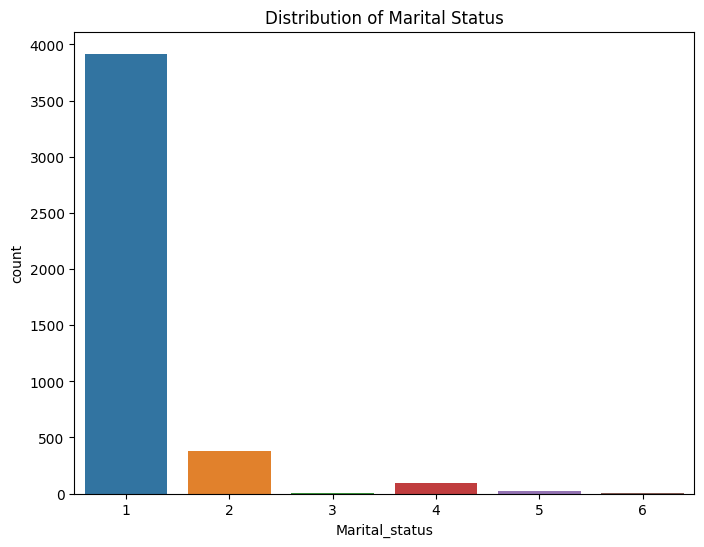

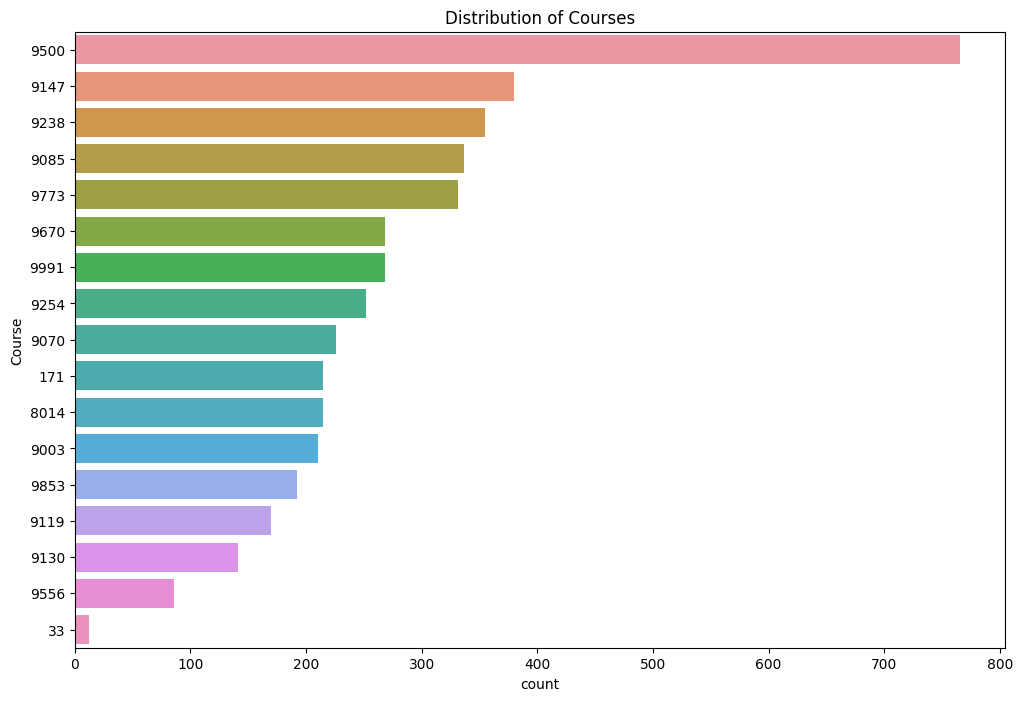

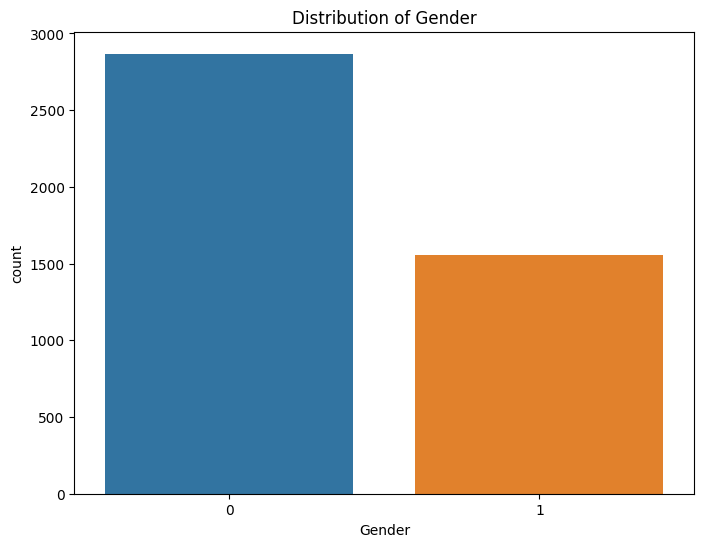

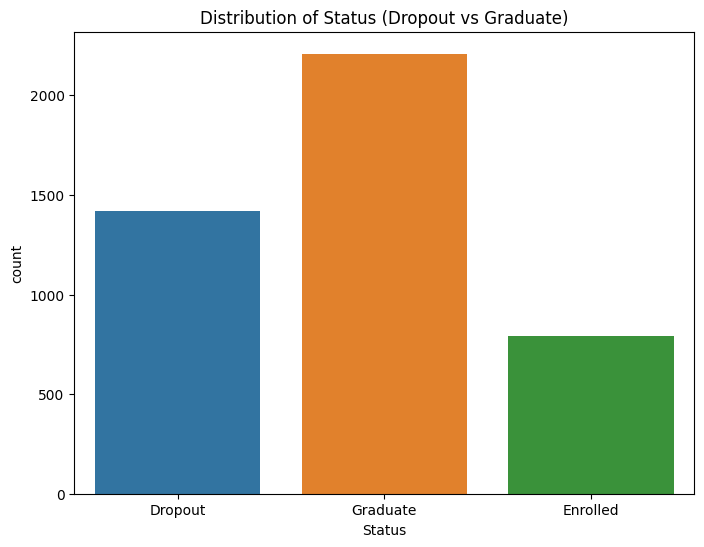

In [8]:
# Plot distribution for Marital_status
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_status', data=df)
plt.title('Distribution of Marital Status')
plt.show()

# Plot distribution for Course
plt.figure(figsize=(12, 8))
sns.countplot(y='Course', data=df, order=df['Course'].value_counts().index)
plt.title('Distribution of Courses')
plt.show()

# Plot distribution for Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

# Plot distribution for Status (Dropout vs Graduate)
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df)
plt.title('Distribution of Status (Dropout vs Graduate)')
plt.show()

##### *Heatmap Correlation*

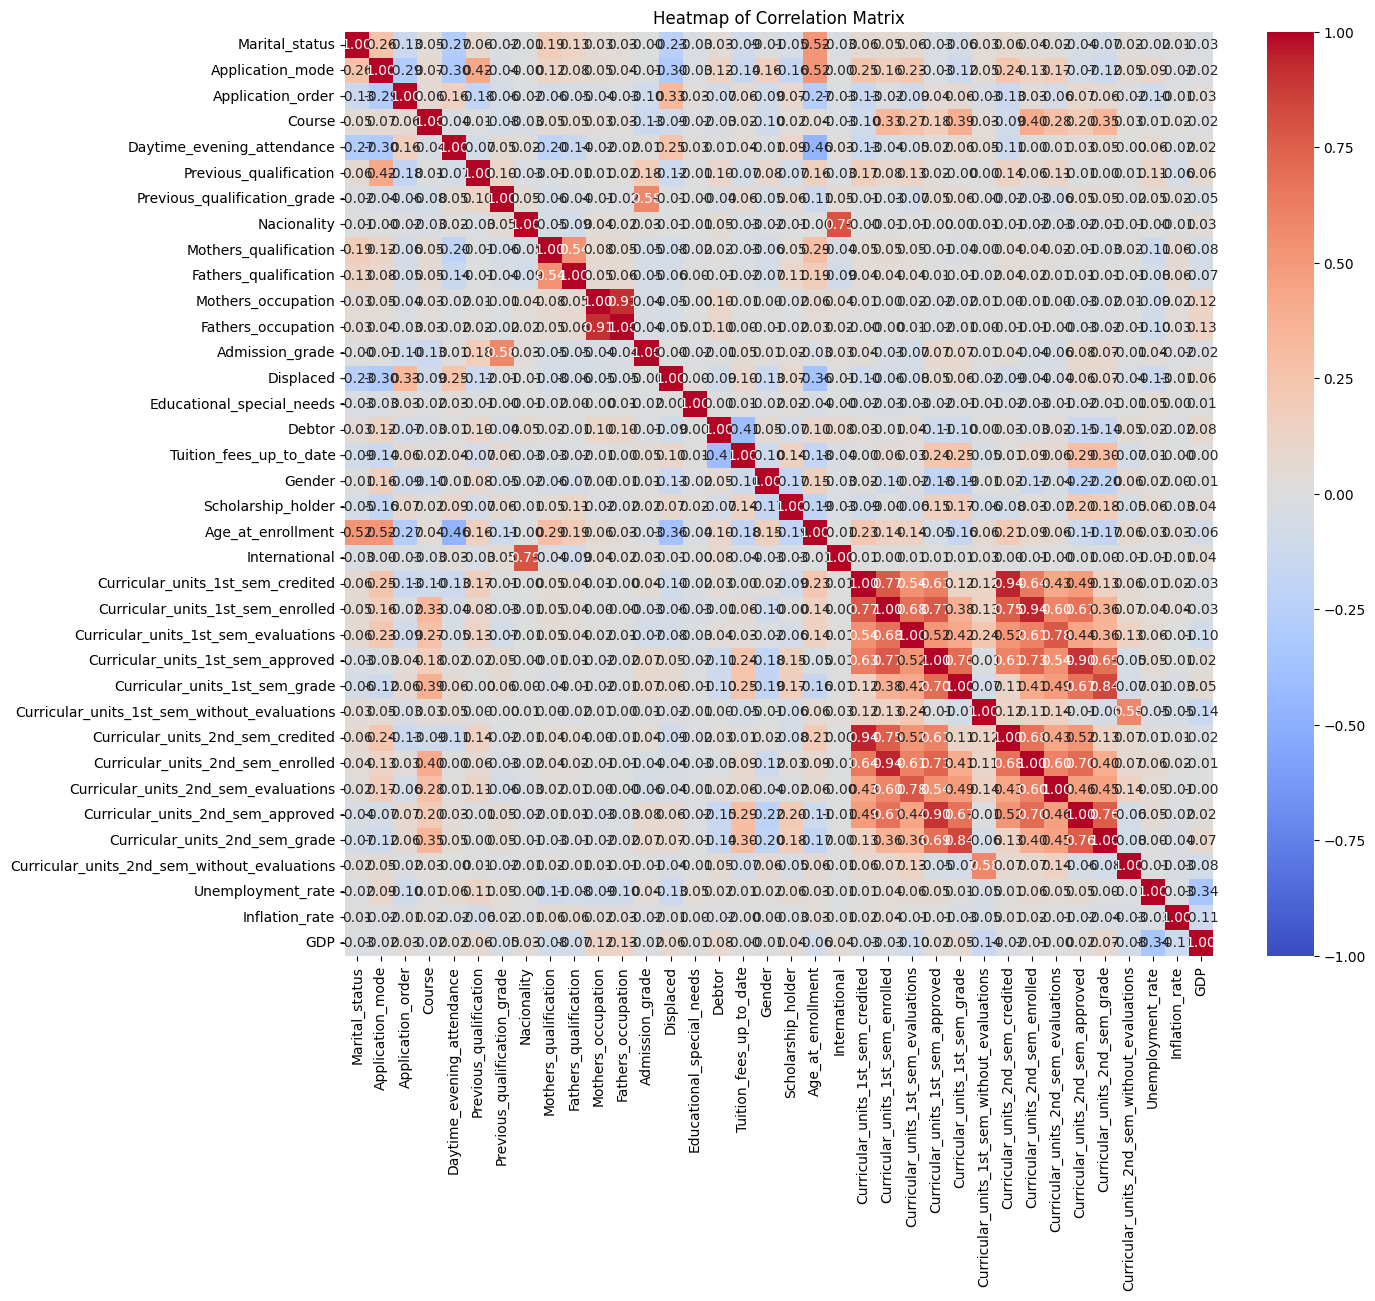

In [9]:
# Remove non-numeric columns before calculating the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting a heatmap to show the correlation matrix
plt.figure(figsize=(14, 12))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Data Preparation/Preprocessing

In [10]:
# List of columns that should be kept based on the provided description
columns_to_keep = [
    'Marital_status',
    'Application_mode',
    'Application_order',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Previous_qualification_grade',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Admission_grade',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'Age_at_enrollment',
    'International',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Status'
]

# Filter the DataFrame to keep only the specified columns
df = df[columns_to_keep]

**Details:**
- **`columns_to_keep`**: This is a list of columns that are selected to be retained in the DataFrame. These columns are chosen because they have clear documentation about their meaning and use, which is crucial for accurate data analysis and modeling.
- **Filtering the DataFrame**: The DataFrame is filtered using the `columns_to_keep` list, ensuring that only these specified columns are preserved in the final DataFrame.

In [11]:
# Identifying columns that can be converted to boolean based on their unique values
boolean_columns = {
    'Daytime_evening_attendance': {1: True, 0: False},
    'Displaced': {1: True, 0: False},
    'Educational_special_needs': {1: True, 0: False},
    'Debtor': {1: True, 0: False},
    'Tuition_fees_up_to_date': {1: True, 0: False},
    'Gender': {1: True, 0: False},
    'Scholarship_holder': {1: True, 0: False},
    'International': {1: True, 0: False},
}

# Applying the mapping to convert these columns to boolean
for column, mapping in boolean_columns.items():
    df[column] = df[column].map(mapping)

**Details:**
- **`boolean_columns`**: This is a dictionary that identifies columns within the DataFrame that can be converted to boolean values (`True` or `False`) based on their unique integer values. The mapping is set such that `1` is mapped to `True` and `0` is mapped to `False`.
- **Applying the Mapping**: The code iterates over each column in the `boolean_columns` dictionary and applies the defined mapping using the `.map()` function. This process converts the specified columns from integer representations to boolean values, ensuring the data is in a more appropriate format for analysis and modeling.

In [12]:
# List of categorical columns that need One-Hot Encoding
categorical_columns = [
    'Application_mode',
    'Course',
    'Marital_status',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation'
]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical columns
encoded_columns = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame for the encoded columns with appropriate column names
encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded columns with the original DataFrame, dropping the original categorical columns
df = pd.concat([df.drop(columns=categorical_columns), encoded_columns_df], axis=1)

**Details:**
- **`categorical_columns`**: This is a list of categorical columns in the DataFrame that require One-Hot Encoding. These columns are selected because they contain categorical data that needs to be converted into a numerical format suitable for machine learning algorithms.
- **One-Hot Encoding**: The `OneHotEncoder` is initialized with the `drop='first'` parameter to prevent the dummy variable trap by dropping the first category. The `sparse_output=False` parameter is used to ensure the output is a dense array rather than a sparse matrix.
- **Fit and Transform**: The encoder is fit to the `categorical_columns` and then transforms them into a series of binary columns, one for each category in the original columns.
- **Creating the Encoded DataFrame**: A new DataFrame, `encoded_columns_df`, is created from the encoded columns, with appropriate column names derived from the original categorical columns.
- **Combining the DataFrames**: The original categorical columns are dropped from the DataFrame, and the new encoded columns are concatenated to form the final DataFrame. This ensures that the DataFrame is ready for analysis and modeling with all categorical variables properly encoded.

In [13]:
# List of numerical columns that should be scaled
numerical_columns = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Age_at_enrollment'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

**Details:**
- **`numerical_columns`**: This is a list of numerical columns in the DataFrame that require scaling. These columns are selected because they contain continuous numerical data that needs to be standardized to improve the performance and convergence of machine learning algorithms.
- **Standard Scaling**: The `StandardScaler` is initialized to scale the numerical columns. This scaler standardizes the features by removing the mean and scaling to unit variance, ensuring that each column has a mean of 0 and a standard deviation of 1.
- **Fit and Transform**: The scaler is fit to the `numerical_columns` and then used to transform these columns. The transformed values replace the original values in the DataFrame, ensuring that the numerical data is on the same scale, which is particularly important for models that are sensitive to feature scaling, such as logistic regression and neural networks.

In [14]:
# Assuming 'Status' contains categorical values like 'Dropout', 'Graduate', etc.
df['Status_encoded'] = df['Status'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2})

**Details:**
- **`Status_encoded`**: This line of code creates a new column, `Status_encoded`, by mapping categorical values in the `Status` column to numerical values. This encoding is necessary for machine learning models, which typically require numerical input rather than categorical labels.
- **Mapping**: The `map` function is used to convert the categorical labels:
  - `'Dropout'` is mapped to `0`
  - `'Graduate'` is mapped to `1`
  - `'Enrolled'` is mapped to `2`
  
  This mapping converts the `Status` column from text-based categories to integer values, allowing it to be used directly as a target variable in classification models.

## Modeling

##### *Train-Test Split*

In [15]:
# Define features (X) and target (y)
X = df.drop(columns=['Status', 'Status_encoded'])  # Drop original and encoded status
y = df['Status_encoded']  # Target variable

# Encode the target variable as binary: Dropout (1) vs Others (0)
y_binary = (y == 0).astype(int)  # Assuming 0 represents 'Dropout'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3539, 212) (885, 212) (3539,) (885,)


##### *Logistic Regression*

In [16]:
# Initialize the One-vs-Rest Random Forest model
ovr_rf = OneVsRestClassifier(RandomForestClassifier(random_state=42))

# Train the model
ovr_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = ovr_rf.predict(X_test)

## Evaluation

##### *Logistic Regression Evaluation*

Random Forest Evaluation for Dropout Prediction
Accuracy: 73.6%


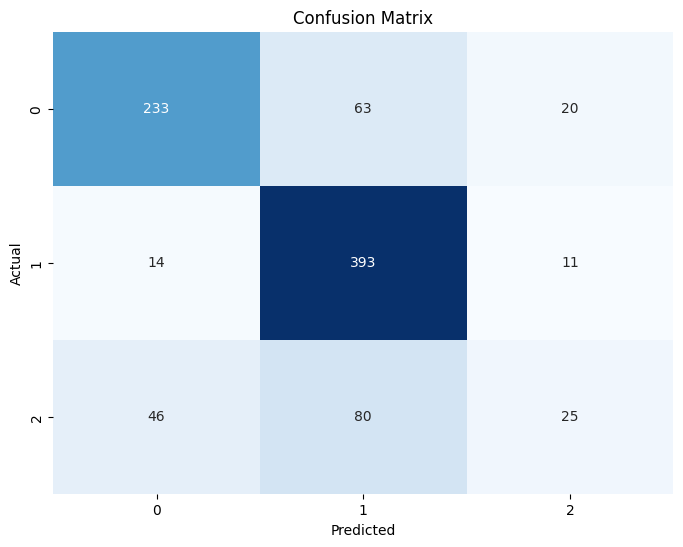

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       316
           1       0.73      0.94      0.82       418
           2       0.45      0.17      0.24       151

    accuracy                           0.74       885
   macro avg       0.66      0.61      0.61       885
weighted avg       0.71      0.74      0.70       885



In [17]:
# Evaluate the model
print("Random Forest Evaluation for Dropout Prediction")

# Display accuracy as a percentage with 1 decimal place
accuracy = accuracy_score(y_test, y_pred_rf) * 100
print(f"Accuracy: {accuracy:.1f}%")

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

##### *Feature Importance*

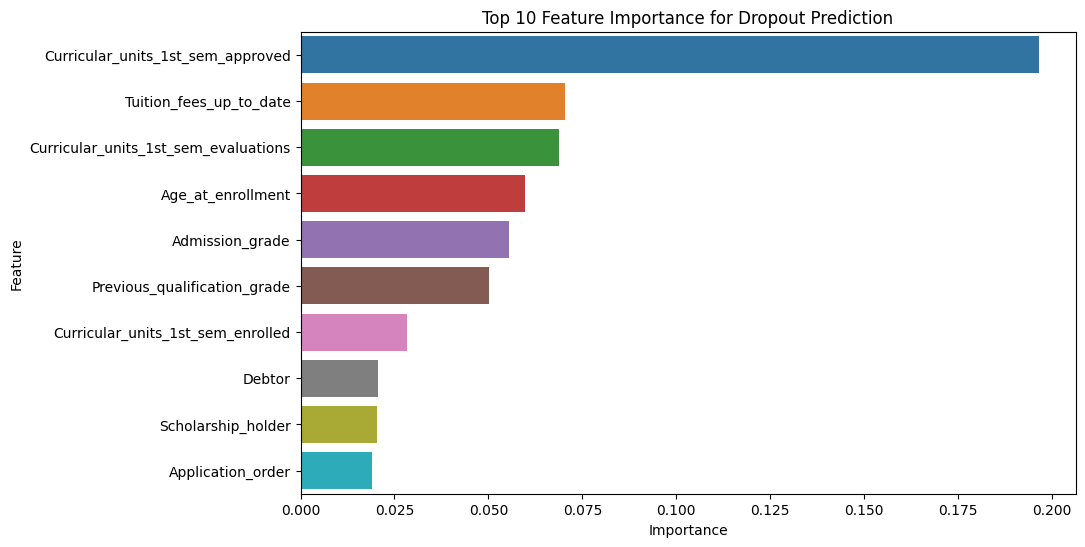

In [18]:
# Get feature importance from the model (for the 'Dropout' class)
feature_importances = ovr_rf.estimators_[0].feature_importances_

# Create a DataFrame for visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance and select the top 10 features
top_10_importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Visualize the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_importance_df)
plt.title('Top 10 Feature Importance for Dropout Prediction')
plt.show()

## Deployment

In [19]:
# Create the directory 'model' if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the Random Forest model
with open('model/random_forest_model.pkl', 'wb') as f:
    pickle.dump(ovr_rf, f)

# Save the scaler
with open('model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the one-hot encoder
with open('model/onehot_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# List of columns used during training
training_columns = X_train.columns.tolist()

# Save the list of columns to a file
with open('model/training_columns.pkl', 'wb') as f:
    pickle.dump(training_columns, f)


##### *Export Clean Data*

In [21]:
df.dtypes

Application_order                 int64
Daytime_evening_attendance         bool
Previous_qualification            int64
Previous_qualification_grade    float64
Admission_grade                 float64
                                 ...   
Fathers_occupation_192          float64
Fathers_occupation_193          float64
Fathers_occupation_194          float64
Fathers_occupation_195          float64
Status_encoded                    int64
Length: 214, dtype: object